In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shutil
import warnings
warnings.filterwarnings('ignore')

def main(df, name_mapping, plot_dir, error_bar_meaning):
    
    df_stats_all_range = df.groupby(['dataset_name', 'user_input_size']).agg({
        'new_global_accuracy': ['mean', 'min', 'max', 'std']
    }).reset_index()


    df_stats_all_range.columns = ['dataset_name', 'user_input_size', 'mean_accuracy', 'min_accuracy', 'max_accuracy','std_accuracy']
    
#     # Create a directory to save the plots
#     output_dir = '/mnt/data/dataset_plots'
    os.makedirs(plot_dir, exist_ok=True)

    # Loop through each dataset and generate the plots
    for idx, dataset_name in enumerate(list(name_mapping)):
        dataset_data = df_stats_all_range[df_stats_all_range['dataset_name'] == dataset_name]

        # Set up the plot for the current dataset
        plt.figure(figsize=(3, 3))

        # Create the bar plot
        bar_plot = sns.barplot(
            x='user_input_size',
            y='mean_accuracy',
            data=dataset_data,
            palette='Set2',
            ci=None,
            capsize=0.2,
            errwidth=1,        
            width=0.5,  # Narrower bars
            # dodge=True  # Ensures bars are packed more closely
        )

        # Add manual error bars for each user_input_size (min to max range)
        for bar, row in zip(bar_plot.patches, dataset_data.itertuples()):
            bar_position = bar.get_x() + bar.get_width() / 2
            error_lower = row.mean_accuracy - row.min_accuracy
            error_upper = row.max_accuracy - row.mean_accuracy
            if(error_bar_meaning=='min_max'):
                plt.errorbar(
                    x=bar_position,
                    y=row.mean_accuracy,
                    yerr=[[error_lower], [error_upper]],  # Define error bars as (min to max)
                    fmt='none',
                    ecolor='black',
                    capsize=5,
                    elinewidth=2.5
                )
            elif(error_bar_meaning=='std'):
                plt.errorbar(
                x=bar_position,
                y=row.mean_accuracy,
                yerr=row.std_accuracy,  # Standard deviation as the error
                fmt='none',
                ecolor='black',
                capsize=5,
                elinewidth=2.5
            )
            else:
                print("not a valid error bar option")
                break
            
#         if idx % 4 == 0:
#             plt.ylabel('Global Acc.', fontsize=16)
#         else:
#             plt.gca().set_yticklabels([])


        # Add the reference line for before_fix_global_accuracy
        before_fix_value = df[df['dataset_name'] == dataset_name]['before_fix_global_accuracy'].iloc[0]
        plt.axhline(y=before_fix_value, linestyle='--', color='red', label='_nolegend_', linewidth=3)

        # Labeling the plot
        plt.title(f'{name_mapping[dataset_name]}', fontsize=18)
        plt.xlabel('# data points', fontsize=18)
        plt.ylabel('Global Acc.', fontsize=18)
        # plt.legend(loc='lower center', fontsize=16)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.tight_layout(pad=1) 
#         # Save the plot as a PNG file
        plt.savefig(f'{plot_dir}/global_accuracy_plot__gpt_lfs_{dataset_name}_error_bar_{error_bar_meaning}.png')
        plt.show()
        plt.close()
        
        
    shutil.make_archive(plot_dir, 'zip', plot_dir)


#     # Zip the directory



In [2]:
df = pd.read_csv('repaired_results_for_gpt_lfs.csv')

In [3]:
pd.Categorical(df['user_input_size'], ordered=True)

[20, 40, 150, 20, 40, ..., 40, 150, 120, 20, 120]
Length: 781
Categories (6, int64): [10 < 20 < 40 < 80 < 120 < 150]

In [4]:
df['dataset_name'].unique()

array(['painter_architect', 'amazon', 'tweets', 'spam',
       'physician_professor', 'imdb', 'fakenews', 'agnews',
       'professor_teacher', 'plots', 'yelp'], dtype=object)

In [5]:
dataset_naming_mappings = {
'amazon': 'Amazon',
'agnews': 'AGNews' ,
'physician_professor': 'PP' ,
'imdb': 'IMDB' ,
'fakenews': 'FNews' ,
'yelp': 'Yelp',
'professor_teacher': 'PT',
'painter_architect': 'PA',
'tweets': 'Tweets',
'spam': 'SMS',
'plots': 'MGenre',
}

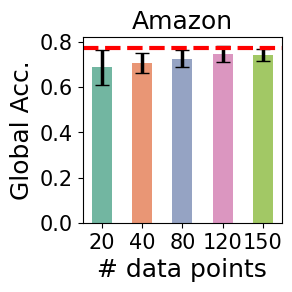

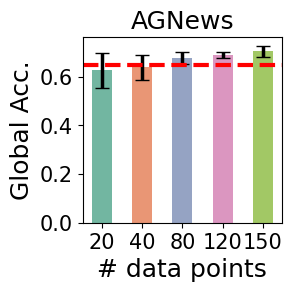

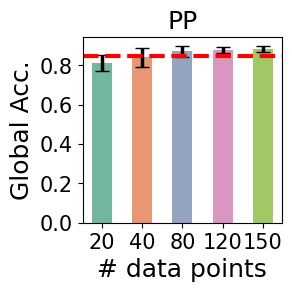

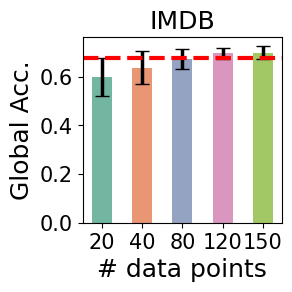

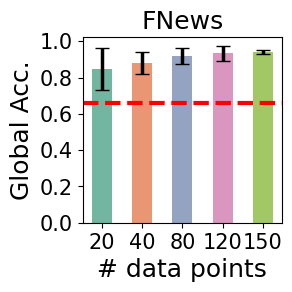

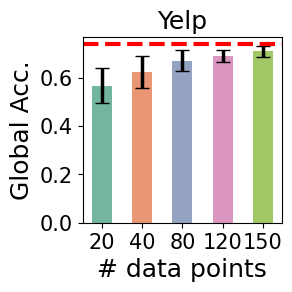

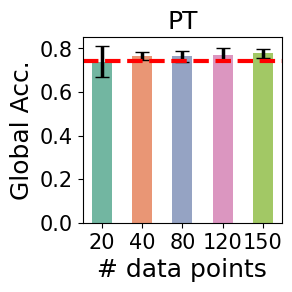

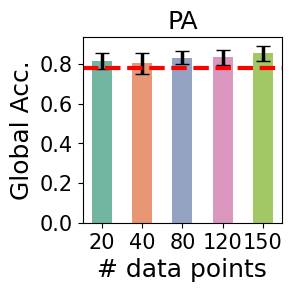

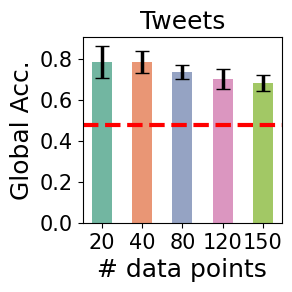

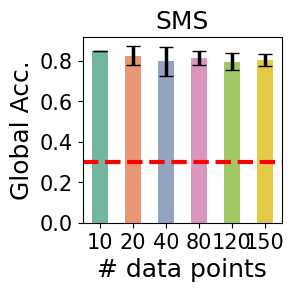

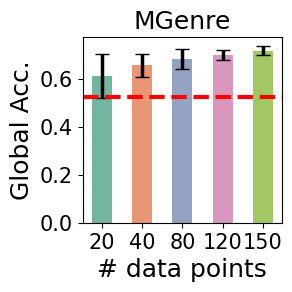

In [6]:
main(df=df, name_mapping=dataset_naming_mappings, plot_dir='./global_accs_gpt_lf_plots_std', error_bar_meaning='std')

In [7]:
list(df)

['before_fix_global_accuracy',
 'user_input_size',
 'lf_acc_thresh',
 'instance_acc_thresh',
 'min_non_abstain_thresh',
 'dataset_name',
 'random_state',
 'confirm_prev_rate',
 'complain_fix_rate',
 'new_global_accuracy',
 'global_accuracy_on_valid_data',
 'new_global_accuracy_on_valid',
 'valid_global_data_size',
 'new_valid_global_data_size',
 'runtimes',
 'optimal_objective_value',
 'snorkel_first_run',
 'snorkel_run_after_fix',
 'solver_runtime',
 'repair_time']

In [8]:
l = ['before_fix_global_accuracy', 'new_global_accuracy', 'dataset_name', 'user_input_size', 'random_state', 'confirm_prev_rate', 'complain_fix_rate', 'new_global_accuracy']

In [9]:
df[df['dataset_name']=='amazon'].sort_values(by=['dataset_name', 'user_input_size', 'random_state'])[l]

,before_fix_global_accuracy,new_global_accuracy,dataset_name,user_input_size,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy
3,0.771673,0.713509,amazon,20,1,1.0,0.7,0.713509
196,0.771673,0.713509,amazon,20,1,1.0,0.7,0.713509
668,0.771673,0.767735,amazon,20,2,1.0,1.0,0.767735
761,0.771673,0.767735,amazon,20,2,1.0,1.0,0.767735
188,0.771673,0.750485,amazon,20,3,1.0,1.0,0.750485
...,...,...,...,...,...,...,...,...
470,0.771673,0.740304,amazon,150,8,1.0,1.0,0.740304
664,0.771673,0.779704,amazon,150,9,1.0,1.0,0.779704
440,0.771673,0.741020,amazon,150,10,1.0,1.0,0.741020
54,0.771673,0.725609,amazon,150,11,1.0,1.0,0.725609


In [10]:
df.groupby(['dataset_name', 'user_input_size']).size()

dataset_name         user_input_size
agnews               20                 20
                     40                 12
                     80                 12
                     120                12
                     150                12
amazon               20                 16
                     40                 12
                     80                 12
                     120                12
                     150                12
fakenews             20                 20
                     40                 12
                     80                 12
                     120                12
                     150                12
imdb                 20                 16
                     40                 12
                     80                 12
                     120                12
                     150                12
painter_architect    20                 20
                     40                 12
                 